# k-Nearest Neighbors (kNN) Classification


This notebook demonstrates how the k-Nearest Neighbors (kNN) algorithm works through visual examples, cross-validation, and hyperparameter tuning. It includes decision boundary visualizations and accuracy comparisons across different `k` values.

## Part 1: Visualizing kNN on Simulated Data

In this section, we:
- Generate synthetic 2D data
- Fit a kNN classifier with `k=3`
- Plot the decision boundaries to understand how the model separates classes

Trainning Score for uniform = 0.8916666666666667
Test Score for uniform = 0.6
Trainning Score for distance = 0.9416666666666667
Test Score for distance = 0.6333333333333333


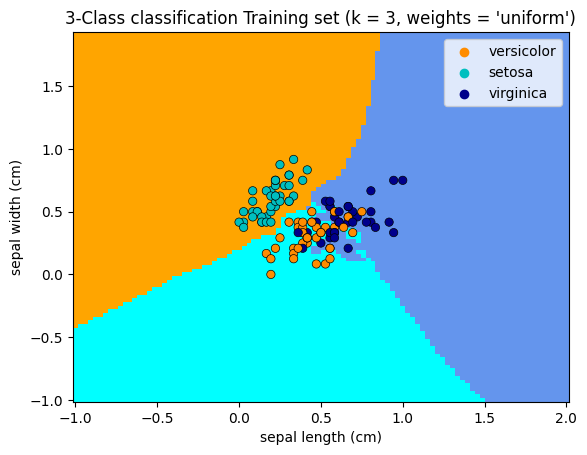

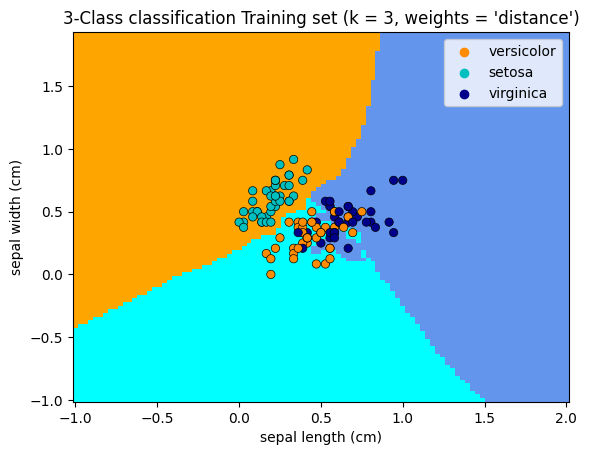

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

n_neighbors = 3

for weights in ["uniform", "distance"]:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_train, y_train)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )

    sns.scatterplot(
        x=X_train[:, 0],
        y=X_train[:, 1],
        hue=iris.target_names[y_train],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification Training set (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

    print("Trainning Score for {} = {}".format(weights, clf.score(X_train,y_train)))
    print("Test Score for {} = {}".format(weights, clf.score(X_test,y_test)))

plt.show()

## Part 2

We test different values of `k` and use cross-validation to:
- Measure the model's accuracy
- Identify the best `k` that minimizes error
- Visualize accuracy vs. k

The following plots show how model accuracy changes with different values of `k` and weights, helping us balance underfitting and overfitting.

<module 'sklearn.neighbors' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/__init__.py'>


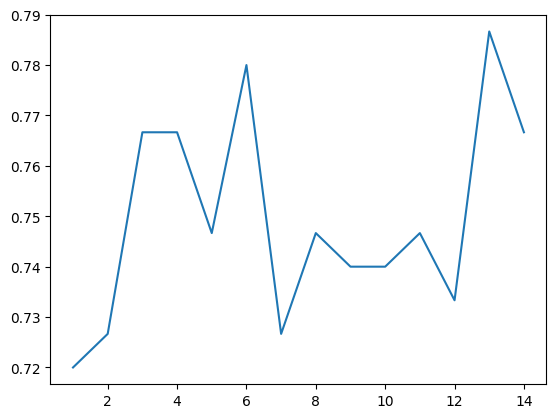

In [13]:
from sklearn.model_selection import cross_validate

score = []
weights = "uniform"
n_k= np.arange(1,15)
print(neighbors)
for k in n_k:
    clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weights)
    scores = cross_validate(clf, X, y, cv=10, scoring = ('accuracy', 'neg_log_loss'))
    score.append(scores['test_accuracy'].mean())

plt.plot(n_k, score)

<module 'sklearn.neighbors' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/__init__.py'>


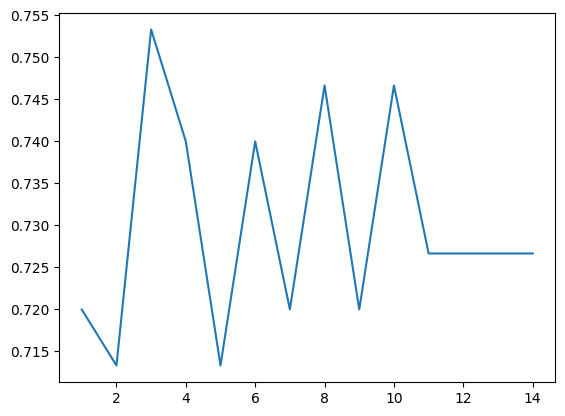

In [14]:
from sklearn.model_selection import cross_validate

score = []
weights = "distance"
n_k= np.arange(1,15)
print(neighbors)
for k in n_k:
    clf = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weights)
    scores = cross_validate(clf, X, y, cv=10, scoring = ('accuracy', 'neg_log_loss'))
    score.append(scores['test_accuracy'].mean())

plt.plot(n_k, score)



## Part 3: PCA Visualization of Predicted vs. Actual Classes

Therefore, the best accuracy was achieved with the uniform weights and neighbors number = 13

In [19]:
n_neighbors = 13

iris = datasets.load_iris()

X = iris.data  # All features: sepal length, sepal width, petal length, petal width
y = iris.target  # Target classes (0, 1, 2)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

weight= "uniform"
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

print("Train Score for {} = {}".format(weights, clf.score(X_train,y_train)))
print("Test Score for {} = {}".format(weights, clf.score(X_test,y_test)))

Train Score for distance = 1.0
Test Score for distance = 0.9666666666666667


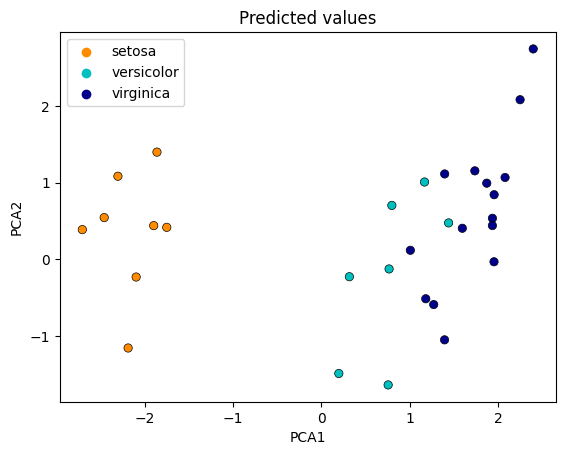

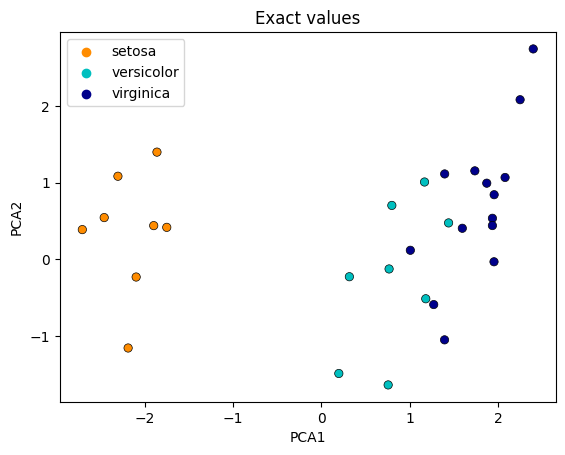

In [24]:
# Plotting the results using PCA to only have 2 coordinates

from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X_train)
X2 = pca.transform(X_test)

label_names = iris.target_names
pred_labels = [label_names[label] for label in y_pred]
true_labels = [label_names[label] for label in y_test]

sns.scatterplot(
x=X2[:, 0],
y=X2[:, 1],
hue=pred_labels,
palette=cmap_bold,
alpha=1.0,
edgecolor="black",
)
plt.title('Predicted values')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


sns.scatterplot(
x=X2[:, 0],
y=X2[:, 1],
hue=true_labels,
palette=cmap_bold,
alpha=1.0,
edgecolor="black",
)
plt.title('Exact values')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

The two scatter plots reflect differences between predicted and true class assignments, showing that most classes were predicted right.

## Part 4: PCA Visualization of the Entire Iris Dataset (2D & 3D)

This section visualizes the full Iris dataset using Principal Component Analysis. By reducing the 4 original features to 2 or 3 components, we can observe how well the classes separate in lower-dimensional space. These plots help us understand the structure of the dataset beyond model performance.


Text(0, 0.5, 'PCA2')

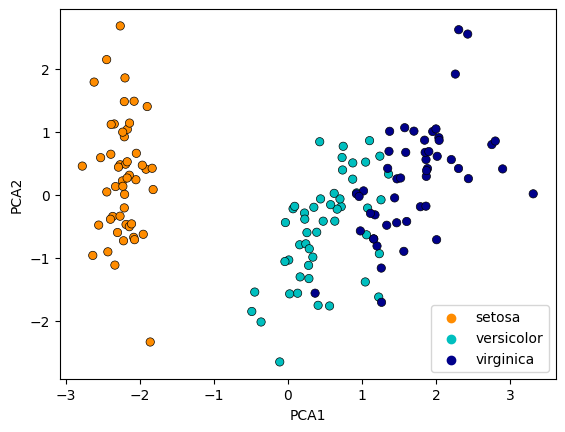

In [25]:
iris = datasets.load_iris()


X = iris.data[:, :]
y = iris.target

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# PCA (2 components) for 2D visualization
pca = decomposition.PCA(n_components=2)
X2 = pca.fit_transform(X)

# 2D scatter plot of all samples with class labels
sns.scatterplot(
x=X2[:, 0],
y=X2[:, 1],
hue=iris.target_names[y],
palette=cmap_bold,
alpha=1.0,
edgecolor="black",
)
plt.xlabel('PCA1')
plt.ylabel('PCA2')

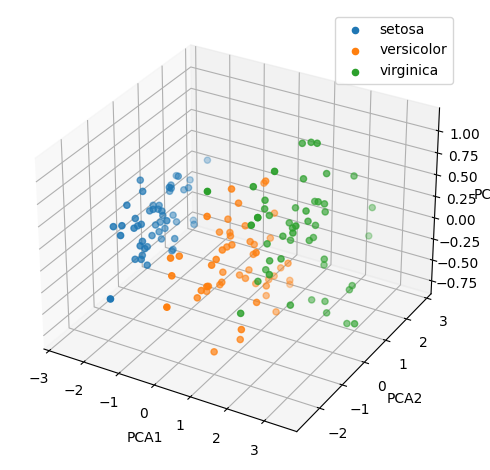

In [26]:
# PCA (3 components) for 3D visualization
pca = decomposition.PCA(n_components=3)
pca.fit(X_train)
X2 = pca.transform(X)

# 3D scatter plot of PCA-reduced data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(3):
    ax.scatter(X2[y==i,0], X2[y==i,1], X2[y==i,2], marker='o',label=iris.target_names[i])

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.tight_layout()
plt.legend()
plt.show()